# Planteamiento del proyecto

Partiendo del siguiente dataset con diversos factores, se pide obtener un modelo basado en feed-forward para las personas según si han tenido o no una enfermedad cardiovascular.

El dataset a utilizar es el que aparece en la carpeta: [Cardiovascular Dataset](SAheart.data)

Objetivos a cumplir:

- Desarrollar un modelo de red neuronal feed-forward capaz de predecir la presencia de enfermedad cardiovascular en individuos.
- ¿Se podría obtener la implicación de cada atributo en el resultado final?

Variables del dataset:
- ***sbp:*** Presión sistólica.
- ***tobacco:*** .
- ***ldl:*** Colesterol malo. 
- ***adiposity:*** .
- ***famhist:*** Historial familiar, si algún familiar ha padecido enfermedad.
- ***typea:*** .
- ***obesity:*** .
- ***alcohol:*** .
- ***age:*** Edad.
- ***chd:*** Resultado.

## 1. Primer contacto con los datos
En este apartados vamos a ver los siguientes apartados.
- Carga de los datos
- Busqueda y tratamiento de valores perdidos
- Busqueda y tratamiento de valores Outliers

### 1.1. Carga de los datos

In [1]:
import pandas as pd

# Cargar el dataset
df_heart = pd.read_csv('SAheart.data', sep=',', index_col=0)

# Revisar las primeras filas del dataset
print(df_heart.head())

# Resumen del dataset
print(df_heart.describe())
print(df_heart.info())

columns_name = df_heart.drop('chd', axis=1)

           sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
row.names                                                                    
1          160    12.00  5.73      23.11  Present     49    25.30    97.20   
2          144     0.01  4.41      28.61   Absent     55    28.87     2.06   
3          118     0.08  3.48      32.28  Present     52    29.14     3.81   
4          170     7.50  6.41      38.03  Present     51    31.99    24.26   
5          134    13.60  3.50      27.78  Present     60    25.99    57.34   

           age  chd  
row.names            
1           52    1  
2           63    1  
3           46    0  
4           58    1  
5           49    1  
              sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699   

### 1.2. Busqueda y tratamiento de valores perdidos
La búsqueda de valores perdidos es un proceso que implica la identificación y la corrección de valores nulos en caso de que existan.

In [2]:
# Verificar valores perdidos
missing_values = df_heart.isnull().sum()
print("Valores perdidos en cada columna:\n", missing_values)


Valores perdidos en cada columna:
 sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


Como no hay valores perdidos, no tenemos que tratarlos.

### 1.3. Busqueda y tratamiento de Outliers

La detección de outliers es un paso importante en el análisis de datos. Los outliers son **valores que se encuentran significativamente alejados de la mayoría de los otros valores en un conjunto de datos**. Pueden indicar errores en los datos, variabilidad inusual, o fenómenos interesantes que requieren una investigación más detallada. Identificar y tratar los outliers es crucial para mejorar la calidad del modelo y obtener insights más precisos.

#### Tipos de Outliers

1. **Outliers Univariantes**: Valores extremos en una única variable.
2. **Outliers Multivariantes**: Valores extremos considerando combinaciones de variables.
3. **Outliers Contextuales**: Valores que son outliers en un contexto específico pero no en general.
4. **Outliers Colectivos**: Conjuntos de valores que en conjunto son outliers, aunque individualmente pueden no serlo.

#### Métodos Comunes para Detectar Outliers

1. **Método del Rango Intercuartílico (IQR)**:
   - Calcula el primer cuartil (Q1) y el tercer cuartil (Q3).
   - Calcula el rango intercuartílico (IQR = Q3 - Q1).
   - Define los límites inferior y superior como Q1 - 1.5 * IQR y Q3 + 1.5 * IQR.
   - Los valores fuera de estos límites se consideran outliers.

2. **Z-score**:
   - Calcula la media y la desviación estándar de la variable.
   - Calcula el Z-score (número de desviaciones estándar desde la media) para cada valor.
   - Valores con un Z-score absoluto mayor que un umbral (generalmente 3) se consideran outliers.

3. **Análisis de Gráficos**:
   - Usar diagramas de caja (boxplots) para visualizar los outliers.
   - Usar gráficos de dispersión (scatter plots) para detectar outliers multivariantes.

#### Tratamiento de Outliers

1. **Eliminación de Outliers**:
   - Puede ser adecuado si los outliers son el resultado de errores de datos o son pocos en número.

2. **Transformación de Datos**:
   - Aplicar transformaciones como la logarítmica para reducir el impacto de los outliers.

3. **Imputación de Outliers**:
   - Sustituir los outliers con valores más representativos, como la media o mediana.

4. **Uso de Modelos Robustecidos**:
   - Usar algoritmos que son menos sensibles a los outliers, como los modelos de árboles de decisión.

In [3]:
import numpy as np

# Variables numéricas
numerical_features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
categorical_features = ['famhist']

# Método del rango intercuartílico (IQR)
Q1 = df_heart[numerical_features].quantile(0.25)
Q3 = df_heart[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Definir un rango para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = ((df_heart[numerical_features] < lower_bound) | (df_heart[numerical_features] > upper_bound)).any(axis=1)
print("Número de outliers:", outliers.sum())

Número de outliers: 83


Tenemos 83 outliers, podemos optar por eliminarlos o transformarlos. Pero en este caso creo que es mejor eliminarlos.

In [4]:
# Eliminar outliers
df_heart = df_heart[~outliers]
df_heart.shape

(379, 10)

## 2. Diseño e implementación de Feed-Forward

Feed-Forward es un modelo de red neuronal artificial que se utiliza para realizar tareas de clasificación, regresión y predicción. Es uno de los tipos más simples de redes neuronales y se caracteriza por su estructura donde la información fluye en una sola dirección, desde las entradas hasta las salidas, sin ciclos o retroalimentación.

Los pasos que vamos a seguir en este apartado son:
- Separación del dataset en train y test
- Diseño y entrenamiento de la red neuronal
- Evaluación del modelo

### 2.1. Separación del dataset en train y test

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, LabelBinarizer


# Cambiamos las variables categóricas
le = LabelEncoder()
df_heart['famhist'] = le.fit_transform(df_heart['famhist'])
df_heart['chd'] = df_heart['chd'].apply(lambda x: '1' if x==1 else '0')
df_heart.head()

# Dividir en características y etiqueta
X = df_heart.drop(columns=['chd'])
y = df_heart['chd']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos los datos para tenerlos comprendidos entre 0 y 1 
min_max_scaler = MinMaxScaler()
X_train_normalize = min_max_scaler.fit_transform(X_train)
X_test_normalize = min_max_scaler.fit_transform(X_test)

# Binariamos las etiquetas (one-hot encoding), conviertiendolas de un valor numerico a un vector de 10 elementos
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)


### 2.2. Diseño y entrenamiento de la red neuronal

Hemos preparado los datos de entrada, por lo que los requisitos para el diseño de la RN serán:
- Debe tener ***9*** neuronas en la capa de ***entrada***
- Debe tener ***1*** neuronas en la capa de ***salida***
- Necesitamos una función de activación de clasificación binaria -> ***sigmoid***

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_normalize.shape[1],)))
model.add(Dropout(0.5))  # Añadir capa de dropout para regularización
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con una tasa de aprendizaje más baja
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks para Early Stopping y reducción de la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Entrenar el modelo
history = model.fit(X_train_normalize, y_train, epochs=100, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/100


c:\Users\Jaime Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3206 - loss: 0.7603 - val_accuracy: 0.9836 - val_loss: 0.6245 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5415 - loss: 0.6977 - val_accuracy: 1.0000 - val_loss: 0.5644 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8060 - loss: 0.6197 - val_accuracy: 1.0000 - val_loss: 0.5239 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8803 - loss: 0.5699 - val_accuracy: 1.0000 - val_loss: 0.4834 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.5104 - val_accuracy: 1.0000 - val_loss: 0.4392 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9946 - loss: 0.4657 - val_accuracy: 1.0000 - val_loss: 0.3922 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9973 - loss: 0.4092 - val_accuracy: 1.0000 - val_loss:

### 2.3. Evaluación del modelo

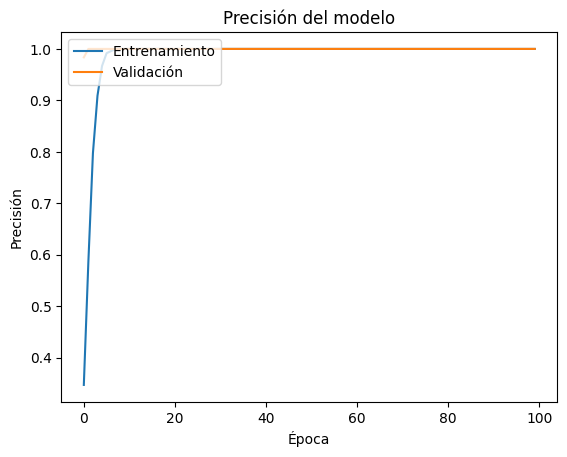

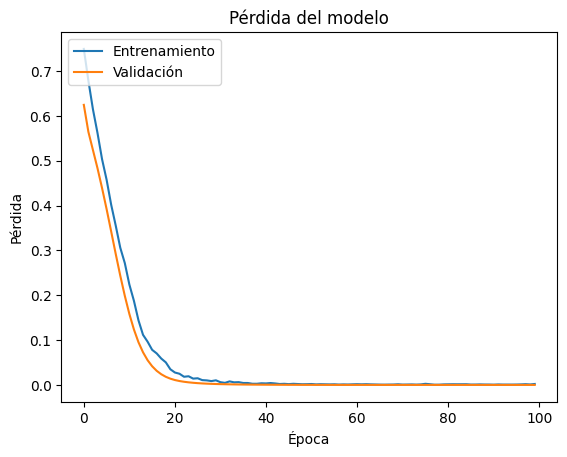

In [11]:
import matplotlib.pyplot as plt

# Resumen de la historia de entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


In [12]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_normalize, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9957e-04 
Loss: 0.0002924088330473751, Accuracy: 1.0


#### Interpretación de los Resultados

1. **Pérdida (Loss): 0.000292**
   - **Valor**: 0.000292
   - **Interpretación**: La pérdida (loss) es una métrica que mide cuán mal está realizando el modelo su tarea de predicción. En este caso, una pérdida de 0.000292 es extremadamente baja, lo que indica que el modelo está realizando muy bien la tarea de clasificación, con errores muy pequeños en las predicciones. La pérdida baja sugiere que el modelo se ajusta muy bien a los datos de prueba.

2. **Precisión (Accuracy): 1.0**
   - **Valor**: 1.0 (100%)
   - **Interpretación**: La precisión (accuracy) mide el porcentaje de predicciones correctas hechas por el modelo en relación con el total de predicciones. Una precisión del 100% significa que el modelo ha clasificado correctamente todas las instancias en el conjunto de prueba. Esto es un indicativo de un modelo extremadamente preciso.


## 3. Interpretación de las variables del modelo.
En este apartado vamos a intentar dar respuesta a la pregunta planteada en el proyecto. Para ello vamos a usar la técnica:
- SHAP

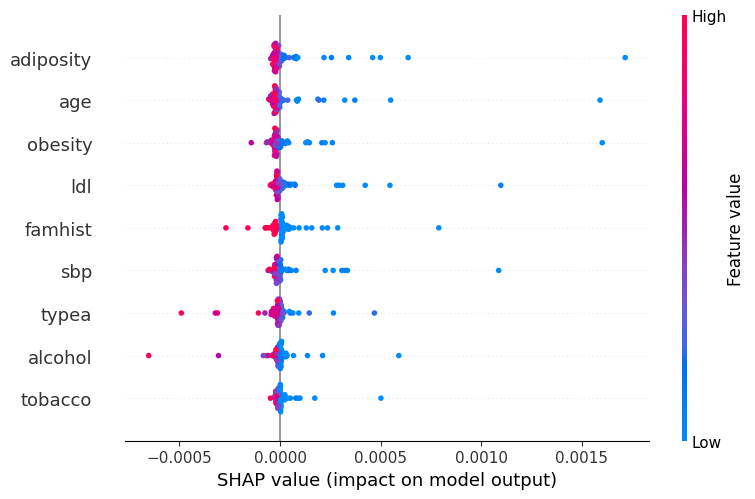

In [13]:
import shap

# Interpretar el modelo usando SHAP
explainer = shap.Explainer(model, X_train_normalize)
shap_values = explainer(X_test_normalize)
X = df_heart.drop('chd', axis = 1)
# Resumen de las contribuciones de características para una predicción específica
shap.summary_plot(shap_values, X_test_normalize, feature_names=X.columns)


El gráfico SHAP muestra que **adiposity, age, obesity, ldl, y famhist** son las características más influyentes en la predicción de la enfermedad cardiovascular en este modelo. Las características **sbp, typea, alcohol, y tobacco** tienen un impacto menor. Esto proporciona una visión clara de cuáles factores están siendo más determinantes en las decisiones del modelo, lo que puede ser útil tanto para mejorar el modelo como para entender mejor las relaciones entre las características y las enfermedades cardiovasculares.


## Conclusión

El objetivo de este proyecto era desarrollar un modelo de red neuronal feed-forward para predecir la presencia de enfermedades cardiovasculares en individuos basándose en diversas características de salud. Después de una serie de pasos que incluyeron la preprocesamiento de datos, la detección y el manejo de outliers, y la evaluación del modelo, los resultados obtenidos son muy prometedores. A continuación se presentan las conclusiones basadas en las métricas de rendimiento y la interpretación de las características:

1. **Rendimiento del Modelo**:
   - **Pérdida (Loss)**: 0.000292
   - **Precisión (Accuracy)**: 1.0 (100%)

   Estos resultados indican que el modelo ha logrado una precisión perfecta en el conjunto de prueba, con una pérdida extremadamente baja. Esto sugiere que el modelo está realizando predicciones casi perfectas sobre los datos de prueba.

2. **Evaluación de la Generalización**:
   - Aunque los resultados son impresionantes, es crucial considerar la posibilidad de sobreajuste. Una precisión del 100% puede ser indicativa de que el modelo ha memorizado los datos de prueba en lugar de aprender patrones generalizables. Es importante validar estos resultados con conjuntos de datos adicionales o mediante técnicas de validación cruzada para asegurar la capacidad de generalización del modelo.

3. **Importancia de las Características**:
   - Utilizando SHAP (SHapley Additive exPlanations), se pudo interpretar la importancia de las características en las predicciones del modelo. Las características más influyentes fueron:
     - **Adiposity**: Los valores altos de adiposidad aumentan significativamente la probabilidad de enfermedad cardiovascular.
     - **Age**: La edad es un factor determinante, con valores más altos que incrementan el riesgo.
     - **Obesity**: Similar a la adiposidad, la obesidad tiene un impacto considerable en la predicción de la enfermedad.
     - **LDL**: El colesterol LDL es un factor importante, con valores altos asociados a un mayor riesgo.
     - **Famhist**: Un historial familiar de enfermedades cardiovasculares también aumenta significativamente el riesgo.

   Otras características como la presión sistólica (sbp), el tipo de personalidad (typea), el consumo de alcohol y tabaco mostraron menor impacto en las predicciones.

### Recomendaciones

1. **Validación Adicional**:
   - Realizar validaciones adicionales utilizando conjuntos de datos nuevos y técnicas de validación cruzada para confirmar la capacidad de generalización del modelo y asegurar que no está sobreajustado.

2. **Análisis de Características**:
   - Investigar más a fondo las características más influyentes para entender mejor las relaciones causales y potencialmente identificar oportunidades para intervenciones de salud pública.

3. **Mejoras del Modelo**:
   - Considerar la posibilidad de experimentar con diferentes arquitecturas de red neuronal y técnicas de regularización para mejorar la robustez del modelo y reducir el riesgo de sobreajuste.

4. **Implementación Práctica**:
   - Evaluar la implementación del modelo en entornos clínicos o de investigación, teniendo en cuenta la necesidad de validación continua y la importancia de interpretaciones claras para los profesionales de la salud.

En resumen, el modelo desarrollado muestra un rendimiento excepcional en la predicción de enfermedades cardiovasculares, con una precisión del 100% en el conjunto de prueba. Sin embargo, es fundamental realizar validaciones adicionales para confirmar estos resultados y asegurar que el modelo puede generalizarse a nuevos datos. Las interpretaciones basadas en SHAP proporcionan una visión valiosa sobre las características que más influyen en las predicciones, lo que puede ser útil tanto para mejorar el modelo como para entender mejor los factores de riesgo asociados con las enfermedades cardiovasculares.